In [1]:
import os

In [2]:
os.chdir("filepath/Kaggle_DataSets/house-prices-advanced-regression-techniques")

In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas_profiling
from sklearn.preprocessing import MinMaxScaler

C:\Users\anilmehra\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\anilmehra\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\anilmehra\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\anilmehra\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\anilmehra\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\anilmehra\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.star

In [5]:
Train_Data=pd.read_csv("train.csv")
Test_Data=pd.read_csv("test.csv")
print("The shape of the Train_Data : ",Train_Data.shape,"The shape of the Test_Data : ",Test_Data.shape)

The shape of the Train_Data :  (1460, 81) The shape of the Test_Data :  (1459, 81)


In [6]:
Merged_Data=pd.concat([Train_Data,Test_Data],axis='rows',sort=False,ignore_index=True)
print("The shape of the Merged_Data : ",Merged_Data.shape)

The shape of the Merged_Data :  (2919, 81)


In [7]:
Merged_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
Merged_Data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.2209
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.7782
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.4234
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.2797
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,187741.8667


In [9]:
corr_matrix=Merged_Data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False) # From here we can choose the variables whic impacting our SalePrice the most

SalePrice        1.000000
GrLivArea        0.588010
OverallQual      0.550911
TotRmsAbvGrd     0.469800
GarageCars       0.469249
GarageArea       0.464809
1stFlrSF         0.462865
TotalBsmtSF      0.453224
FullBath         0.433710
YearBuilt        0.362066
MasVnrArea       0.355608
Fireplaces       0.353567
YearRemodAdd     0.350032
GarageYrBlt      0.325297
LotFrontage      0.318084
LotArea          0.296497
BsmtFinSF1       0.272202
2ndFlrSF         0.272140
WoodDeckSF       0.238381
OpenPorchSF      0.236376
BedroomAbvGr     0.229611
HalfBath         0.228837
BsmtUnfSF        0.175195
BsmtFullBath     0.148210
ScreenPorch      0.082308
PoolArea         0.081039
MoSold           0.067222
3SsnPorch        0.029979
MiscVal         -0.000037
BsmtFinSF2      -0.007437
Id              -0.011630
BsmtHalfBath    -0.012623
LowQualFinSF    -0.015395
YrSold          -0.039064
OverallCond     -0.065785
EnclosedPorch   -0.070698
KitchenAbvGr    -0.071760
MSSubClass      -0.087910
Name: SalePr

In [ ]:
# Checking the scatter plot for the categorical variable vs SalePrice so that we can see the overall impact of the the variable

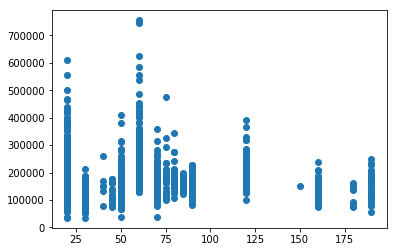

In [10]:
plt.scatter(Merged_Data['MSSubClass'],Merged_Data['SalePrice'])

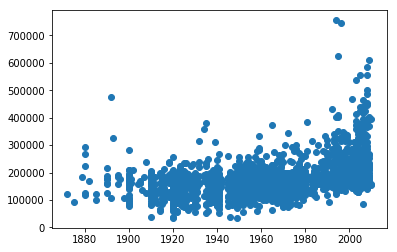

In [11]:
plt.scatter(Merged_Data['YearBuilt'],Merged_Data['SalePrice'])

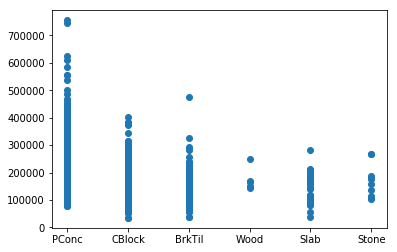

In [12]:
plt.scatter(Merged_Data['Foundation'],Merged_Data['SalePrice'])

In [13]:
Most_Rel_Var=['Id',
'SalePrice',
'GrLivArea',
'OverallQual',
'TotRmsAbvGrd',
'GarageCars',
'GarageArea',
'1stFlrSF',
'TotalBsmtSF',
'FullBath',
'YearBuilt',
'MasVnrArea',
'Fireplaces',
'YearRemodAdd',
'GarageYrBlt',
'LotFrontage',
'LotArea',
'BsmtFinSF1',
'2ndFlrSF',
'WoodDeckSF',
'OpenPorchSF',
'BedroomAbvGr',
'HalfBath',
'BsmtUnfSF',
'BsmtFullBath',
'Foundation',
'RoofStyle',
'HouseStyle'
]

In [15]:
Merged_Data_BAT=Merged_Data.copy() # BAT : Before Any Treatment

In [17]:
Merged_Data=Merged_Data[Most_Rel_Var]

print("The shape of the Merged_Data : ",Merged_Data.shape)

The shape of the Merged_Data :  (2919, 28)


In [18]:
Merged_Data_Obj_Var=Merged_Data.select_dtypes(include='object').columns

In [19]:
Merged_Data_Obj_Var

Index(['Foundation', 'RoofStyle', 'HouseStyle'], dtype='object')

In [20]:
Merged_Data[Merged_Data_Obj_Var].isnull().sum()

Foundation    0
RoofStyle     0
HouseStyle    0
dtype: int64

In [21]:
Merged_Data_Num_Var=Merged_Data.select_dtypes(exclude='object').columns

In [22]:
Merged_Data_Num_Var

Index(['Id', 'SalePrice', 'GrLivArea', 'OverallQual', 'TotRmsAbvGrd',
       'GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'MasVnrArea', 'Fireplaces', 'YearRemodAdd', 'GarageYrBlt',
       'LotFrontage', 'LotArea', 'BsmtFinSF1', '2ndFlrSF', 'WoodDeckSF',
       'OpenPorchSF', 'BedroomAbvGr', 'HalfBath', 'BsmtUnfSF', 'BsmtFullBath'],
      dtype='object')

In [23]:
Merged_Data[Merged_Data_Num_Var].isnull().sum()

Id                0
SalePrice         0
GrLivArea         0
OverallQual       0
TotRmsAbvGrd      0
GarageCars        1
GarageArea        1
1stFlrSF          0
TotalBsmtSF       1
FullBath          0
YearBuilt         0
MasVnrArea       23
Fireplaces        0
YearRemodAdd      0
GarageYrBlt     159
LotFrontage     486
LotArea           0
BsmtFinSF1        1
2ndFlrSF          0
WoodDeckSF        0
OpenPorchSF       0
BedroomAbvGr      0
HalfBath          0
BsmtUnfSF         1
BsmtFullBath      2
dtype: int64

In [24]:
Merged_Data_MissingVal_Var=Merged_Data.columns[Merged_Data.isnull().any()]

In [25]:
Merged_Data_MissingVal_Var

Index(['GarageCars', 'GarageArea', 'TotalBsmtSF', 'MasVnrArea', 'GarageYrBlt',
       'LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath'],
      dtype='object')

In [ ]:
# Checking the distribution of the Missing value variables

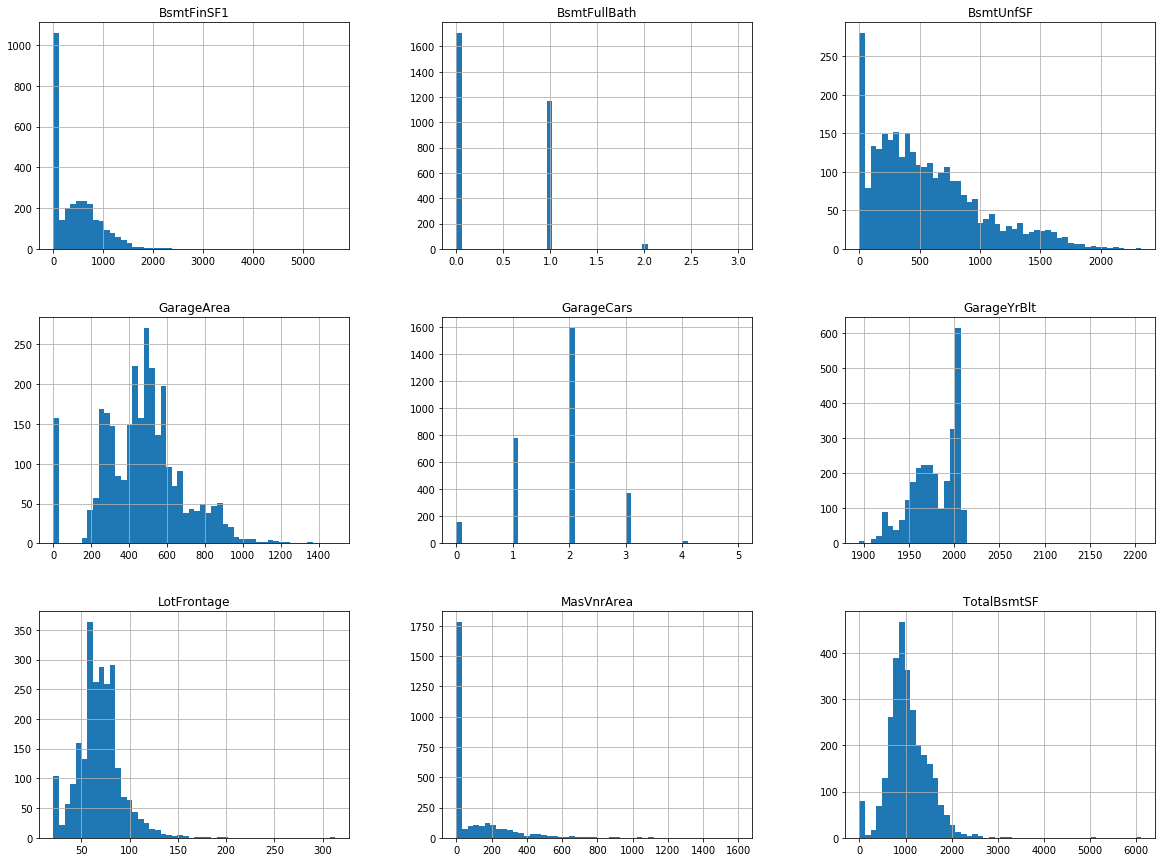

In [27]:
Merged_Data[Merged_Data_MissingVal_Var].hist(bins=50,figsize=(20,15))
plt.show()

In [28]:
# Missing value must be treated with 'Median' after analysing the graph of each Missing value variable

In [30]:
from sklearn.preprocessing import Imputer

In [32]:
imp = Imputer(missing_values='NaN', strategy='median')
Merged_Data[Merged_Data_MissingVal_Var]=imp.fit_transform(Merged_Data[Merged_Data_MissingVal_Var])

print("Missing value after treatment : ",Merged_Data.isnull().sum().sum())

Missing value after treatment :  0


In [33]:
Train_Data_BOT=Merged_Data.loc[Merged_Data['Id']<=1460]
Test_Data_BOT=Merged_Data.loc[Merged_Data['Id']>1460]

print("The shape of the Train_Data_BOT : ",Train_Data_BOT.shape)
print("The shape of the Test_Data_BOT : ",Test_Data_BOT.shape) # BOT : Before outlier treatment

The shape of the Train_Data_BOT :  (1460, 28)
The shape of the Test_Data_BOT :  (1459, 28)


In [34]:
Train_Data_AOT=Train_Data_BOT[Train_Data_BOT['GrLivArea']<4000]
print("The shape of the Train_Data_AOT : ",Train_Data_AOT.shape)

The shape of the Train_Data_AOT :  (1456, 28)


In [35]:
Merged_Data_AOT=pd.concat([Train_Data_AOT,Test_Data_BOT],axis='rows',sort=False,ignore_index=True)

print("The Shape of the Merged_Data_AOT : ",Merged_Data_AOT.shape)

The Shape of the Merged_Data_AOT :  (2915, 28)


In [36]:
Merged_Data_Obj_Var

Index(['Foundation', 'RoofStyle', 'HouseStyle'], dtype='object')

In [37]:
Merged_Data_AOT_BDV=Merged_Data_AOT.copy() # BDV: Before dummy variable creation

In [39]:
# Hot encoding

In [40]:
Merged_Data_Encoded=pd.get_dummies(columns=['Foundation', 'RoofStyle', 'HouseStyle'],data=Merged_Data_AOT,drop_first=True)

print("The shape of the Merged_Data_Encoded : ",Merged_Data_Encoded.shape)

The shape of the Merged_Data_Encoded :  (2915, 42)


In [41]:
Train_Data_Encoded=Merged_Data_Encoded.loc[Merged_Data_Encoded['Id']<=1460]
Test_Data_Encoded=Merged_Data_Encoded.loc[Merged_Data_Encoded['Id']>1460]

print("The shape of the Train_Data_Encoded : ",Train_Data_Encoded.shape)
print("The shape of the Test_Data_Encoded : ",Test_Data_Encoded.shape)

The shape of the Train_Data_Encoded :  (1456, 42)
The shape of the Test_Data_Encoded :  (1459, 42)


In [42]:
list(Merged_Data_Encoded)

['Id',
 'SalePrice',
 'GrLivArea',
 'OverallQual',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'MasVnrArea',
 'Fireplaces',
 'YearRemodAdd',
 'GarageYrBlt',
 'LotFrontage',
 'LotArea',
 'BsmtFinSF1',
 '2ndFlrSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'BedroomAbvGr',
 'HalfBath',
 'BsmtUnfSF',
 'BsmtFullBath',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl']

In [43]:
Features=['GrLivArea',
 'OverallQual',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'MasVnrArea',
 'Fireplaces',
 'YearRemodAdd',
 'GarageYrBlt',
 'LotFrontage',
 'LotArea',
 'BsmtFinSF1',
 '2ndFlrSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'BedroomAbvGr',
 'HalfBath',
 'BsmtUnfSF',
 'BsmtFullBath',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl']

In [44]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [46]:
min_max_scaler=MinMaxScaler()

In [49]:
Train_Data_Scaled_X=min_max_scaler.fit_transform(Train_Data_Encoded[Features])
Train_Data_Scaled_Y=np.vstack(Train_Data_Encoded['SalePrice'].values)

print("The Shape of the Train_Data_Scaled_X : ",Train_Data_Scaled_X.shape)
print("The Shape of the Train_Data_Scaled_Y : ",Train_Data_Scaled_Y.shape)


The Shape of the Train_Data_Scaled_X :  (1456, 40)
The Shape of the Train_Data_Scaled_Y :  (1456, 1)


In [50]:
Test_Data_Scaled_X=min_max_scaler.fit_transform(Test_Data_Encoded[Features])
Test_Data_Scaled_Y=np.vstack(Test_Data_Encoded['SalePrice'].values)

print("The Shape of the Test_Data_Scaled_X : ",Test_Data_Scaled_X.shape)
print("The Shape of the Test_Data_Scaled_Y : ",Test_Data_Scaled_Y.shape)


The Shape of the Test_Data_Scaled_X :  (1459, 40)
The Shape of the Test_Data_Scaled_Y :  (1459, 1)


In [51]:
Linear_Reg_Model=LinearRegression()

In [52]:
Linear_Reg_Model.fit(Train_Data_Scaled_X,Train_Data_Scaled_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
Train_Data_Scaled_Y_Pred=Linear_Reg_Model.predict(Train_Data_Scaled_X)

In [54]:
Train_Data_Scaled_Y_Pred

array([[222680.45960842],
       [174100.80251106],
       [219900.6695657 ],
       ...,
       [231296.25812258],
       [135215.3396753 ],
       [155998.24339833]])

In [55]:
from sklearn import  metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [56]:
r2_score(Train_Data_Scaled_Y,Train_Data_Scaled_Y_Pred)

0.8651450151380711

In [57]:
mean_squared_error(Train_Data_Scaled_Y,Train_Data_Scaled_Y_Pred)

792721728.0352552

In [59]:
Test_Data_Scaled_Y_Pred=Linear_Reg_Model.predict(Test_Data_Scaled_X)

In [60]:
Test_Data_Scaled_Y_Pred

array([[110281.55286323],
       [151615.20736968],
       [158134.48222254],
       ...,
       [174695.14288234],
       [ 94773.05613956],
       [219338.45312399]])

In [74]:
Prediction_Test_Y=pd.DataFrame(columns=['Predicted_SalePrice'],data=Test_Data_Scaled_Y_Pred)

In [75]:
Prediction_Test_Y

,Predicted_SalePrice
0,110281.552863
1,151615.207370
2,158134.482223
3,168357.259867
4,160124.346867
5,159880.056766
6,145466.717739
7,139238.500287
8,183697.118874
9,84557.554468


In [96]:
ID

,index,Id
0,1456,1461
1,1457,1462
2,1458,1463
3,1459,1464
4,1460,1465
5,1461,1466
6,1462,1467
7,1463,1468
8,1464,1469
9,1465,1470


In [72]:
Test_Data_Scaled_Y_Pred

array([[110281.55286323],
       [151615.20736968],
       [158134.48222254],
       ...,
       [174695.14288234],
       [ 94773.05613956],
       [219338.45312399]])

In [112]:
Output=pd.concat([ID,Prediction_Test_Y],axis=1)

In [113]:
Output.head(10)

,Id,Predicted_SalePrice
0,1461,110281.552863
1,1462,151615.207370
2,1463,158134.482223
3,1464,168357.259867
4,1465,160124.346867
5,1466,159880.056766
6,1467,145466.717739
7,1468,139238.500287
8,1469,183697.118874
9,1470,84557.554468


In [115]:
Output.to_csv('Submission_Data.csv',index=False)